### IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import suptitle

In [3]:
train = pd.read_csv("E:/Kaggle Datasets/Black Friday Sales Pred/train.csv")

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [146]:
train.shape

(550068, 12)

#### DATA CLEANING 

In [147]:
train.isnull().mean()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

In [148]:
train['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [149]:
train['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [150]:
train['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [6]:
mode = train['Product_Category_1'].mode()[0]
train['Product_Category_2'].fillna(mode,inplace=True) ## USED MODE[0] AS MODE WAS NOT WORKING AS IT HAS AN INDEX WITH ITSELF

In [7]:
mode = train['Product_Category_3'].mode()[0]
train['Product_Category_3'].fillna(mode,inplace=True) ## USED MODE[0] AS MODE WAS NOT WORKING AS IT HAS AN INDEX WITH ITSELF

In [8]:
train.isnull().mean()   

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

## EXPLORATORY DATA ANALYSIS

In [154]:
con_var = []
cat_var = []
dis_var = []

for i in train.columns:
    if train[i].dtype == 'O':
        cat_var.append(i)
    elif (train[i].dtype == 'int64' or 'float64')and(train[i].nunique()>=25):
        con_var.append(i)
    else:
        dis_var.append(i)

In [155]:
print("CONTINUOUS VAR --- ",con_var,'\n')
print("CATEGORICAL VAR --- ",cat_var,'\n')
print("DISCRETE VAR ---- ",dis_var,'\n')

CONTINUOUS VAR ---  ['User_ID', 'Purchase'] 

CATEGORICAL VAR ---  ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'] 

DISCRETE VAR ----  ['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'] 



###### TOP 10 MOST SOLD PRODUCT IN BLACK FRIDAY

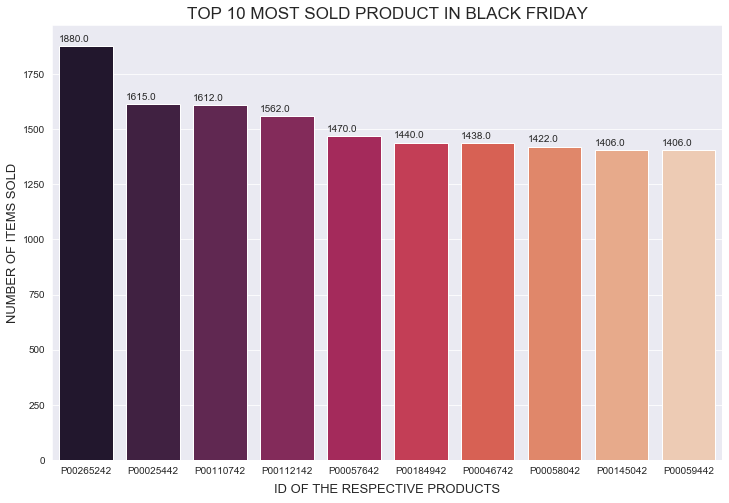

In [156]:
m = train['Product_ID'].value_counts()[:10]

sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.title("TOP 10 MOST SOLD PRODUCT IN BLACK FRIDAY",fontdict={"fontsize":17,"fontweight":16},pad=6)
ax = sns.barplot(m.index,m.values,palette='rocket')
ax.set_ylabel("NUMBER OF ITEMS SOLD",fontdict={"fontsize":13,"fontweight":15})
ax.set_xlabel("ID OF THE RESPECTIVE PRODUCTS",fontdict={"fontsize":13,"fontweight":15},labelpad=8)

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+20))
    
plt.show()

#### WHICH GENDER SHOWED MORE INTREST

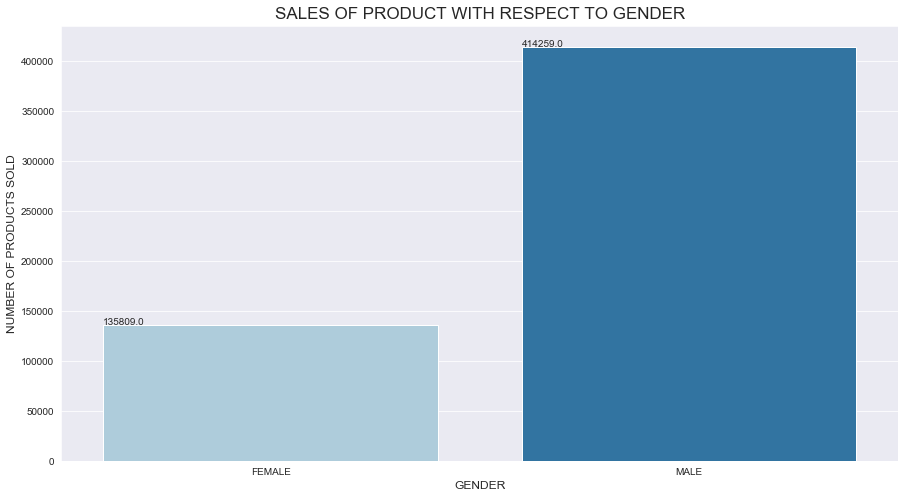

In [157]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))

plt.title("SALES OF PRODUCT WITH RESPECT TO GENDER",fontdict={"fontsize":17,"fontweight":15},pad=7)
ax = sns.countplot(train['Gender'],palette="Paired")
ax.set_xticklabels(labels=['FEMALE',"MALE"],)
ax.set_xlabel("GENDER",fontdict={"fontsize":12,"fontweight":15})
ax.set_ylabel("NUMBER OF PRODUCTS SOLD",fontdict={"fontsize":12,"fontweight":15})

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+20))
    
plt.show()

###### WHICH AGE GROUP SHOWED MORE INTREST

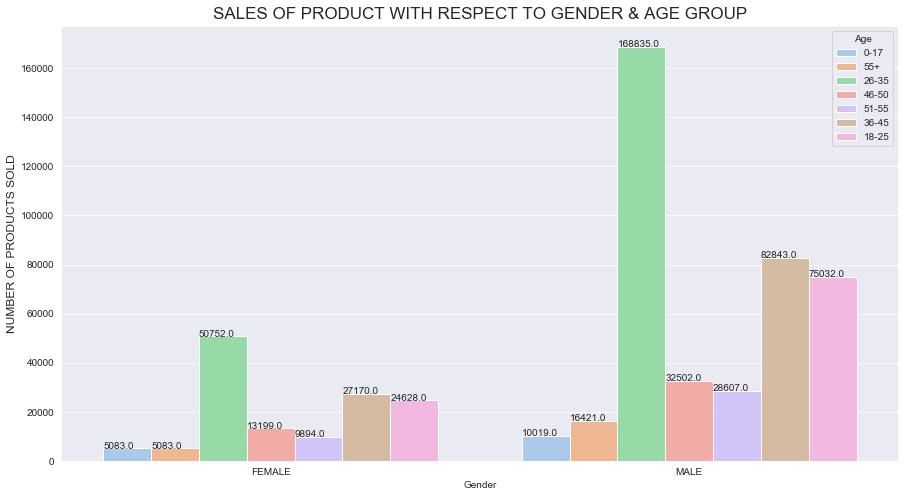

In [158]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")


plt.title("SALES OF PRODUCT WITH RESPECT TO GENDER & AGE GROUP",fontdict={"fontsize":17,"fontweight":15},pad=7)
ax = sns.countplot(train['Gender'],hue=train['Age'],palette="pastel")
ax.set_xticklabels(labels=['FEMALE',"MALE"])
ax.set_ylabel("NUMBER OF PRODUCTS SOLD",fontdict={"fontsize":12,"fontweight":15})


for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+20))
            
plt.show()

* WE CAN SEE THAT IN BOTH THE GENDER THE ADULT AGE GROUP(26-35) SHOWED MORE INTREST IN THE BLACK FRIDAY SALE,FOLLOWED BY THE
  AGE GROUP (36-45)

###### WHICH CITY CATEGORY SHOWED THE MOST & LEAST INTEREST

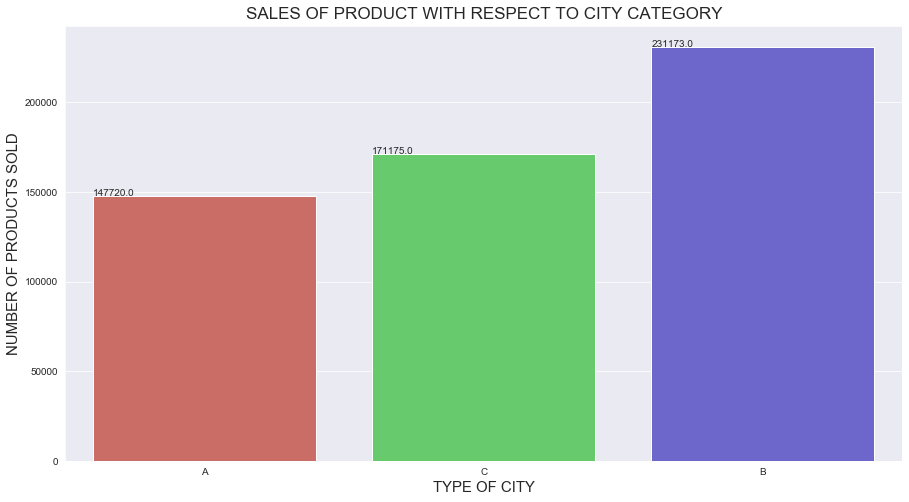

In [159]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")


plt.title("SALES OF PRODUCT WITH RESPECT TO CITY CATEGORY",fontdict={"fontsize":17,"fontweight":15},pad=7)
ax = sns.countplot(train['City_Category'],palette="hls")
ax.set_xlabel("TYPE OF CITY",fontdict={"fontsize":15,"fontweight":15})
ax.set_ylabel("NUMBER OF PRODUCTS SOLD",fontdict={"fontsize":15,"fontweight":15})


for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+20))
            
plt.show()

###### WHICH GENDER FROM WHICT TYPE OF CITY SHOWED MORE INTREST

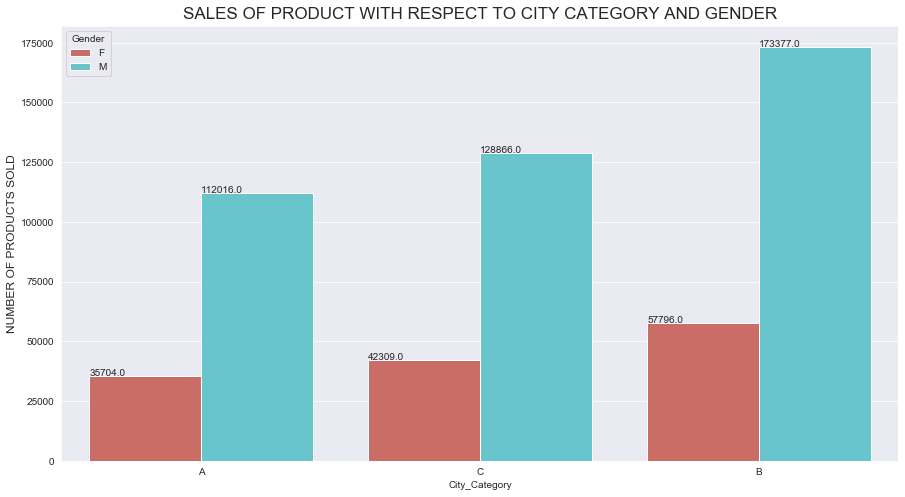

In [160]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")


plt.title("SALES OF PRODUCT WITH RESPECT TO CITY CATEGORY AND GENDER",fontdict={"fontsize":17,"fontweight":15},pad=7)
ax = sns.countplot(train['City_Category'],hue=train['Gender'],palette="hls")
#ax.set_xticklabels(labels=['FEMALE',"MALE"])
ax.set_ylabel("NUMBER OF PRODUCTS SOLD",fontdict={"fontsize":12,"fontweight":15})


for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+20))
            
plt.show()

* WE CAN CLEARLY SEE THAT MOST OF THE MENS AS WELL AS WOMEN HAVE SHOWN INTREST FROM CITY 'B' FOLLOWED BY CITY 'C' AND CITY 'A'

###### DOES THE RATE OF PURCHASE  OF MALES AND FEMALES DEPEND ON THE NUMBER OF YEARS OF LIVING  ?

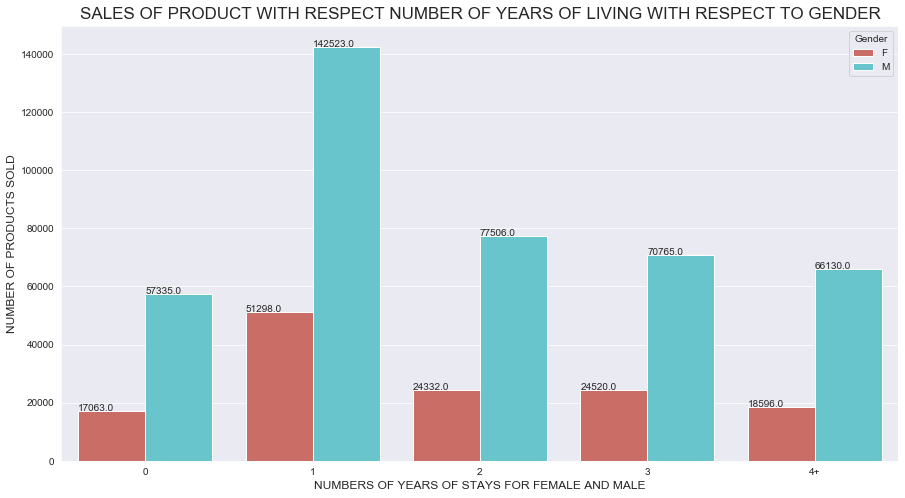

In [161]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")


plt.title("SALES OF PRODUCT WITH RESPECT NUMBER OF YEARS OF LIVING WITH RESPECT TO GENDER",fontdict={"fontsize":17,"fontweight":15},pad=7)
ax = sns.countplot(x=train['Stay_In_Current_City_Years'],hue=train['Gender'],palette="hls",order=['0','1','2','3','4+'])
ax.set_ylabel("NUMBER OF PRODUCTS SOLD",fontdict={"fontsize":12,"fontweight":15})
ax.set_xlabel("NUMBERS OF YEARS OF STAYS FOR FEMALE AND MALE",fontdict={"fontsize":12,"fontweight":15})

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+20))
            
plt.show()

* MALES AND FEMALES ON THEIR YEAR FIRST YEARS SEEM TO BUY MORE THAN MALES AND FEMALES LIVING FOR MORE NUMBER OF YEARS
  AS THE NUMBER OF RESIDENCE INCREASES SALES DECREASES

###### NUMBER OF SALES WITH RESPECT TO GENDER AND THEIR OCCUPATION

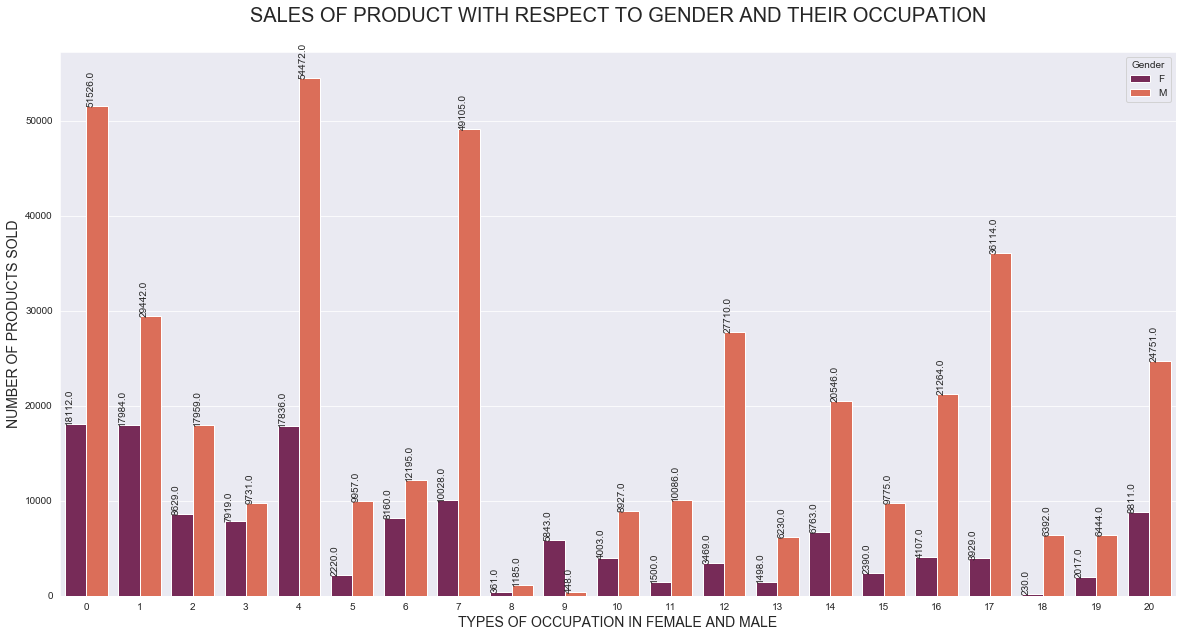

In [162]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")

plt.title("SALES OF PRODUCT WITH RESPECT TO GENDER AND THEIR OCCUPATION",fontdict={"fontsize":20,"fontweight":19},pad=30)
ax = sns.countplot(x=train['Occupation'],hue=train['Gender'],palette="rocket")
ax.set_ylabel("NUMBER OF PRODUCTS SOLD",fontdict={"fontsize":14,"fontweight":20})
ax.set_xlabel("TYPES OF OCCUPATION IN FEMALE AND MALE",fontdict={"fontsize":14,"fontweight":20})

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+100),rotation=90)
    

            
plt.show()

* MALE AND FEMALE WITH OCCUPATION 4,0,7,1,17,12,20 .... SHOW MORE INTREST/BUY MORE AS COMPARED TO OTHERS

###### DOES MARITUAL STARUS AFFECT OF A GENDER AFFECT THE SALES

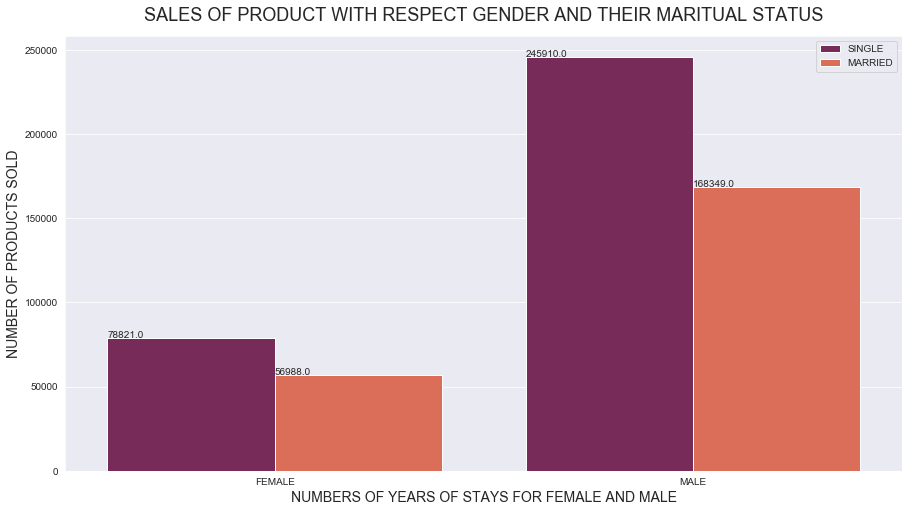

In [163]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")

plt.title("SALES OF PRODUCT WITH RESPECT GENDER AND THEIR MARITUAL STATUS",fontdict={"fontsize":18,"fontweight":15},pad=15)
ax = sns.countplot(x=train['Gender'],hue=train['Marital_Status'],palette="rocket")
ax.set_ylabel("NUMBER OF PRODUCTS SOLD",fontdict={"fontsize":14,"fontweight":15})
ax.set_xlabel("NUMBERS OF YEARS OF STAYS FOR FEMALE AND MALE",fontdict={"fontsize":14,"fontweight":15})
ax.set_xticklabels(['FEMALE',"MALE"])

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+100))
    
plt.legend(["SINGLE",'MARRIED'])

            
plt.show()

* HERE WE CAN SEE THAT SINGLE MALES AS WELL AS SINGLE FEMALE SHOW MORE INTREST IN BLACK FRIDAY THAN MARRIED MENS & WOMENS

In [164]:
cat_var

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [165]:
con_var

['User_ID', 'Purchase']

In [166]:
train['Gender'].unique()

array(['F', 'M'], dtype=object)

In [167]:
dis_var

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

###### WHATS THE MEDIAN PURCHASE PRICE PURCHASE MADE MY SINGLE MALE AND SINGLE FEMALE

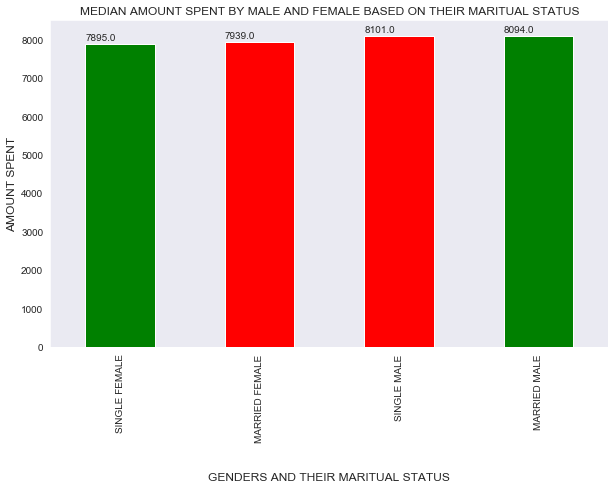

In [168]:
sns.set_style("dark")
plt.figure(figsize=(10,6))
m = train.groupby(["Gender","Marital_Status"]).median()['Purchase']
ax = m.plot(kind='bar',color=['green','red','red','green'])
plt.title("MEDIAN AMOUNT SPENT BY MALE AND FEMALE BASED ON THEIR MARITUAL STATUS")
plt.xticks([0,1,2,3],['SINGLE FEMALE',"MARRIED FEMALE","SINGLE MALE",'MARRIED MALE'])
plt.ylabel("AMOUNT SPENT",fontdict={"fontsize":12,"fontweight":15})
plt.xlabel("GENDERS AND THEIR MARITUAL STATUS",fontdict={"fontsize":12,"fontweight":15},labelpad=30)

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+100))
    
    
plt.show()

* WE CAN SEE THAT THERE IS NO SIGNIFICANT DIFFERENCE BETWEEN MEDIAN AMOUNT SPENT BASED ON  MALE AND FEMALE AND THEIR MARTUAL STATUS,HOWEVER, MARRIED FEMALES AND SINGLE MALES SPEND A LITTLE MORE THAN THE OTHER TWO GROUPS

* LETS CHECK THE DISTRIBUTION OF PURCHASES MADE BY MALES AND FEMALES BASED ON MARITUAL STATUS

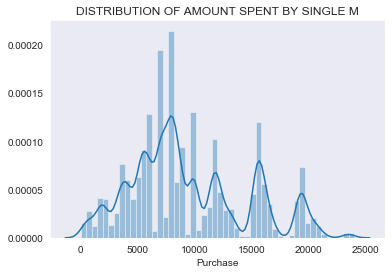

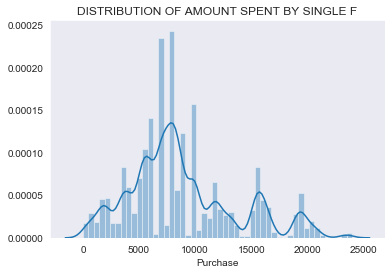

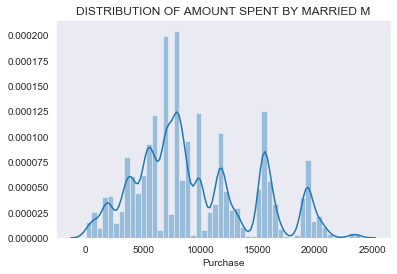

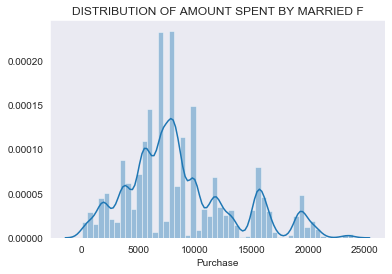

In [169]:
k = [1,0]
k1 = ['M',"F"]

sns.set_style("dark")

for i in k:
    for j in k1:
        if i==1:
            s = "SINGLE"
            sam = train[(train['Gender']==j)&(train['Marital_Status']==i)]
            ## HISTOGRAM
            plt.title("DISTRIBUTION OF AMOUNT SPENT BY {} {}".format(s,j))
            sns.distplot(sam['Purchase'])
            plt.show()
        else:
            s = "MARRIED"
            sam = train[(train['Gender']==j)&(train['Marital_Status']==i)]
            ## HISTOGRAM
            plt.title("DISTRIBUTION OF AMOUNT SPENT BY {} {}".format(s,j))
            sns.distplot(sam['Purchase'])
            plt.show()
            
            

* THE DISTRIBUTION ALSO SHOWS NO SIGNIFICANT CHANGE

In [170]:
con_var

['User_ID', 'Purchase']

In [171]:
cat_var

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [172]:
dis_var

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

###### WHICH AGE GROUP OF ITS RESPECTIVE GENDER SPENDS THE MOST ON BLACK FRIDAY SALE

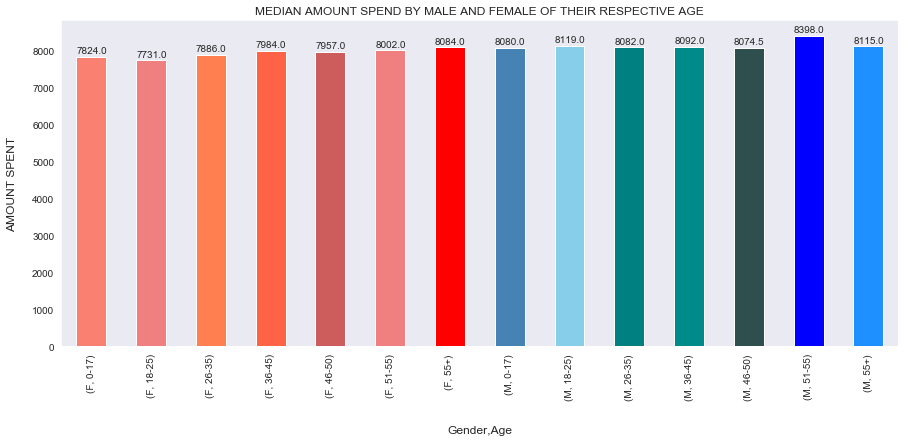

In [173]:
m = train.groupby(["Gender","Age"]).median()['Purchase']

plt.figure(figsize=(15,6))
plt.title("MEDIAN AMOUNT SPEND BY MALE AND FEMALE OF THEIR RESPECTIVE AGE")
plt.xlabel("GENDER AND THEIR AGE GROUP",fontdict={"fontsize":12,"fontweight":15},labelpad=25)
plt.ylabel("AMOUNT SPENT",fontdict={"fontsize":12,"fontweight":15},labelpad=15)
ax = m.plot(kind='bar',color=['salmon','lightcoral','coral','tomato','indianred','lightcoral','red','steelblue','skyblue','teal','darkcyan','darkslategrey','blue','dodgerblue'])

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+100))
    
plt.show()

* HERE TOO THE CHANGE IS NOT SIGNIFICANCE BUT ELDER FEMALE(55+) AND ELDER MALE(51-55) SPEND LITTLE MORE THAN OTHERS

#### WHICH AGE GROUP OF ITS RESPECTIVE GENDER AND CITY TYPE SPENDS THE MOST ON BLACK FRIDAY SALE

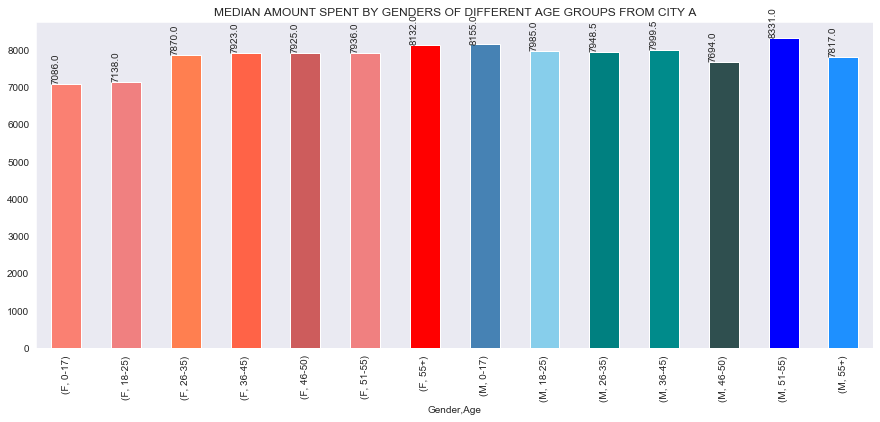

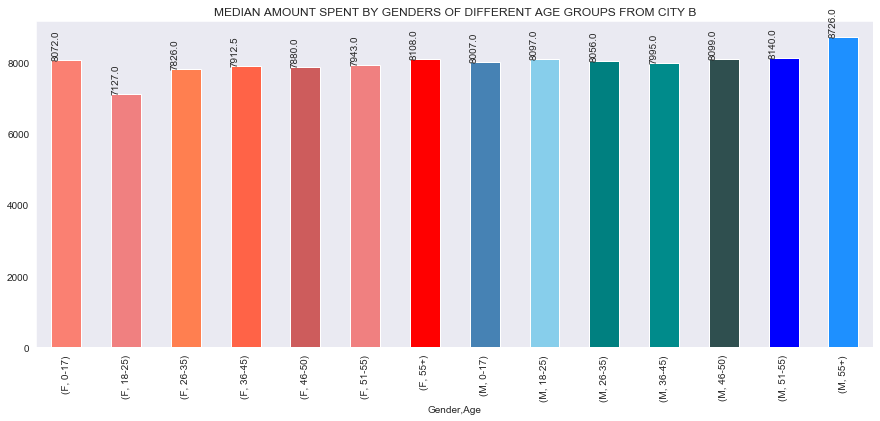

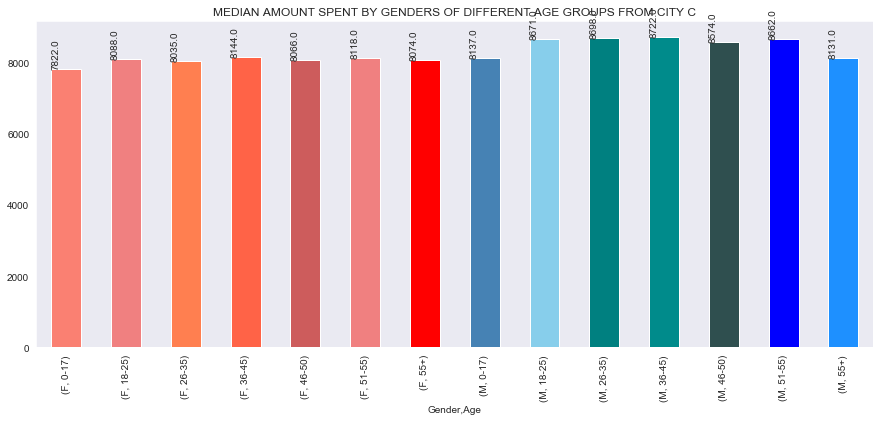

In [174]:
color=['salmon','lightcoral','coral','tomato','indianred','lightcoral','red','steelblue','skyblue','teal','darkcyan','darkslategrey','blue','dodgerblue']
for city_type in ["A","B","C"]:
    plt.figure(figsize=(15,6))
    plt.title("MEDIAN AMOUNT SPENT BY GENDERS OF DIFFERENT AGE GROUPS FROM CITY {}".format(city_type))
    plt.xlabel("CITY CATEGORY {} -- GENDER -- AGE".format(city_type))
    df = train[train['City_Category']==city_type]
    ax = df.groupby(['Gender',"Age"]).median()["Purchase"].plot(kind='bar',color=color)

    for p in ax.patches:
        ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+50),rotation=90)

    plt.show()

* WE CAN SEE THAT THERE IS NO SIGNIFICANCE AS SUCH FOR THE MEDIAN PURCHASES

###### DELETING USELESS COLUMNS

In [9]:
train_copy = train.copy()

In [10]:
train = train_copy

In [11]:
train_copy.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,5.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,5.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,5.0,16.0,7969


In [12]:
train.drop(columns=["User_ID","Product_ID","Product_Category_2","Product_Category_3"],axis=1,inplace=True)

###### ENCODING FEATURES

In [13]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10,A,2,0,3,8370
1,F,0-17,10,A,2,0,1,15200
2,F,0-17,10,A,2,0,12,1422
3,F,0-17,10,A,2,0,12,1057
4,M,55+,16,C,4+,0,8,7969


In [14]:
for feature in train.columns:
    print(train[feature].value_counts()[:10])

M    414259
F    135809
Name: Gender, dtype: int64
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
Name: Occupation, dtype: int64
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
0    324731
1    225337
Name: Marital_Status, dtype: int64
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
Name: Product_Category_1, dtype: int64
7011    191
7193    188
6855    187
6891    184
6960    183
7012    183
6879    182
7166    182
7027    182
7165    180
Name: Purchase, dtype: int64


###### ENCODING GENDER

In [15]:
mapp = {"M":1,"F":0}

train['Gender'] = train['Gender'].map(mapp)

In [16]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,0,0-17,10,A,2,0,3,8370
1,0,0-17,10,A,2,0,1,15200
2,0,0-17,10,A,2,0,12,1422
3,0,0-17,10,A,2,0,12,1057
4,1,55+,16,C,4+,0,8,7969


In [17]:
train.shape

(550068, 8)

###### ENCODING AGE

In [18]:
train['Age'].value_counts()[:5]

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
Name: Age, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Age'] = le.fit_transform(train['Age'])

In [20]:
train.shape

(550068, 8)

In [21]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,0,0,10,A,2,0,3,8370
1,0,0,10,A,2,0,1,15200
2,0,0,10,A,2,0,12,1422
3,0,0,10,A,2,0,12,1057
4,1,6,16,C,4+,0,8,7969


In [22]:
train.drop(columns=["Age"],axis=1,inplace=True)

In [23]:
train.shape

(550068, 7)

###### ENCODING CITY CATEGORY

In [24]:
train_copy = train.copy()

In [25]:
dummy = pd.get_dummies(train['City_Category'],drop_first=True)

In [26]:
x = pd.concat([train,dummy],axis=1,join="inner")

In [27]:
x.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,B,C
0,0,10,A,2,0,3,8370,0,0
1,0,10,A,2,0,1,15200,0,0
2,0,10,A,2,0,12,1422,0,0
3,0,10,A,2,0,12,1057,0,0
4,1,16,C,4+,0,8,7969,0,1


In [28]:
del x['City_Category']

In [29]:
x.shape

(550068, 8)

In [30]:
train = x

In [31]:
train.shape

(550068, 8)

In [32]:
train.head(10)

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,B,C
0,0,10,2,0,3,8370,0,0
1,0,10,2,0,1,15200,0,0
2,0,10,2,0,12,1422,0,0
3,0,10,2,0,12,1057,0,0
4,1,16,4+,0,8,7969,0,1
5,1,15,3,0,1,15227,0,0
6,1,7,2,1,1,19215,1,0
7,1,7,2,1,1,15854,1,0
8,1,7,2,1,1,15686,1,0
9,1,20,1,1,8,7871,0,0


In [33]:
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [34]:
train['Stay_In_Current_City_Years'] = np.where((train['Stay_In_Current_City_Years']=='4+'),'4',train['Stay_In_Current_City_Years'])

In [35]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype("int32")

In [36]:
train.head()

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,B,C
0,0,10,2,0,3,8370,0,0
1,0,10,2,0,1,15200,0,0
2,0,10,2,0,12,1422,0,0
3,0,10,2,0,12,1057,0,0
4,1,16,4,0,8,7969,0,1


###### ENCODING PRODUCT CATEGORY

In [37]:
train_copy = train.copy()

In [38]:
dummy = pd.get_dummies(train['Product_Category_1'],drop_first=True)

In [39]:
x = pd.concat([train,dummy],axis=1,join="inner")

In [40]:
x.drop(columns=['Product_Category_1'],axis=1,inplace=True)

In [41]:
train = x

In [42]:
train.head()

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase,B,C,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,0,10,2,0,8370,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,10,2,0,15200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,10,2,0,1422,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,10,2,0,1057,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,16,4,0,7969,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 26 columns):
Gender                        550068 non-null int64
Occupation                    550068 non-null int64
Stay_In_Current_City_Years    550068 non-null int32
Marital_Status                550068 non-null int64
Purchase                      550068 non-null int64
B                             550068 non-null uint8
C                             550068 non-null uint8
2                             550068 non-null uint8
3                             550068 non-null uint8
4                             550068 non-null uint8
5                             550068 non-null uint8
6                             550068 non-null uint8
7                             550068 non-null uint8
8                             550068 non-null uint8
9                             550068 non-null uint8
10                            550068 non-null uint8
11                            550068 non-null uint8
12   

#### FEATURE SELECTION

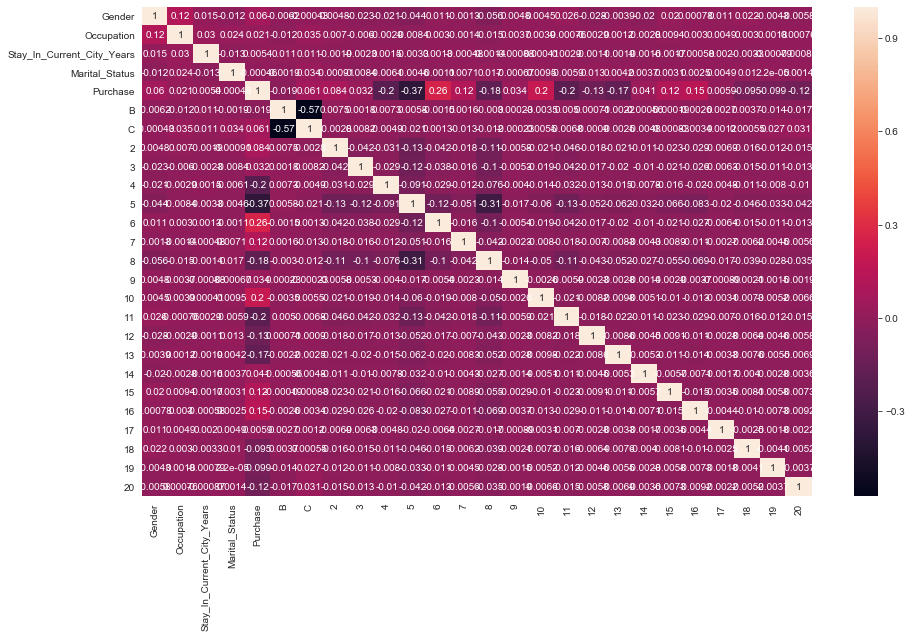

In [317]:
plt.figure(figsize=(15,9))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [318]:
##### Checking Feature Importance

In [371]:
Y = train["Purchase"]
X = train.drop(columns=["Purchase"],inplace=False)

In [320]:
from sklearn.ensemble import ExtraTreesRegressor

In [321]:
model = ExtraTreesRegressor()

In [322]:
model.fit(X,Y)

C:\Users\paddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [323]:
print(model.feature_importances_)

[0.00173255 0.02423189 0.01176544 0.00266931 0.0011537  0.00409086
 0.01725298 0.0277744  0.12964403 0.20523628 0.00836837 0.00296467
 0.14553045 0.00030532 0.01935604 0.13575212 0.05822768 0.08750636
 0.00059753 0.00097907 0.00132934 0.00074156 0.03627819 0.03116674
 0.04534512]


In [324]:
### VISUALIZING IMPORTANCES

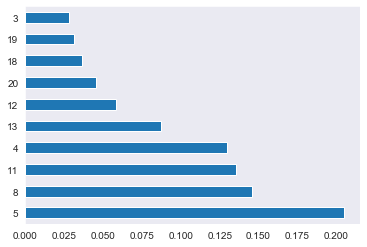

In [325]:
feature_importance = pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

In [100]:
train.to_csv("E:/Kaggle Datasets/Black Friday Sales Pred/Pre-Processed Black Friday.csv")

In [37]:
train2 = train.copy()

In [498]:
train2.head()

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase,B,C,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,0,10,2,0,91.487704,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,10,2,0,123.288280,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,10,2,0,37.709415,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,10,2,0,32.511536,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,16,4,0,89.269256,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


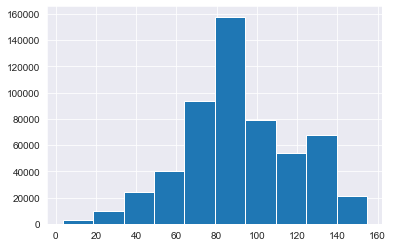

In [493]:
np.sqrt(train['Purchase']).hist()

In [40]:
train2['Purchase'] = np.sqrt(train['Purchase'])

In [38]:
train.head()

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase,B,C,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,0,10,2,0,8370,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,10,2,0,15200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,10,2,0,1422,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,10,2,0,1057,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,16,4,0,7969,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
train2.head()

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase,B,C,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,0,10,2,0,91.487704,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,10,2,0,123.288280,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,10,2,0,37.709415,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,10,2,0,32.511536,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,16,4,0,89.269256,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### SPLITTING DATA

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
Y = train["Purchase"]
X = train.drop(columns=["Purchase"],inplace=False)

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=1)

###### MODELLING

In [47]:
###### Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [49]:
lr = LinearRegression().fit(X_train,Y_train)

In [50]:
lr.score(X_train,Y_train)

0.6383697268244244

In [51]:
lr.score(X_test,Y_test)

0.6412262205122418

In [49]:
pred = lr.predict(X_test)

In [56]:
print("Mean Squared Error -- > ",mean_squared_error(Y_test,pred))
print("Mean Absolute Error -- > ",mean_absolute_error(Y_test,pred))
print("Root Mean Squared Error -- > ",np.sqrt(mean_squared_error(Y_test,pred)))
print("R2 value ---------------- > ",r2_score(Y_test,pred))

Mean Squared Error -- >  9085876.987252668
Mean Absolute Error -- >  2281.145408805375
Root Mean Squared Error -- >  3014.278850281219
R2 value ---------------- >  0.6412262205122418


###### Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
del rfr

In [71]:
rfr = RandomForestRegressor(max_depth=35)

In [72]:
rfr.fit(X_train,Y_train)

C:\Users\paddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=35,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [73]:
print("Fit On Train --- > ",rfr.score(X_train,Y_train))
print("Fit On Test --- > ",rfr.score(X_test,Y_test))

Fit On Train --- >  0.6674756222215346
Fit On Test --- >  0.6507544873859975


In [74]:
pred_tree = rfr.predict(X_test)

In [75]:
sample_tree = pd.DataFrame({"REAL":Y_test,"PREDICTED":pred,"RES":Y_test-pred_tree})

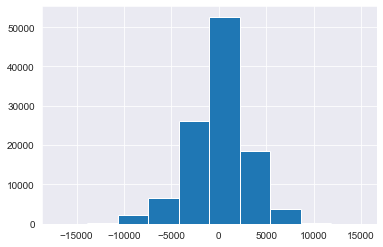

In [76]:
sns.set_style("darkgrid")
sample_tree['RES'].hist()
plt.show()

###### XGB

In [52]:
import xgboost as xgb

In [53]:
xgb_model = xgb.XGBRegressor().fit(X_train,Y_train)

In [54]:
print("Fit On Training --- > ",xgb_model.score(X_train,Y_train))
print("Fit On Testing --- > ",xgb_model.score(X_test,Y_test))

Fit On Training --- >  0.6507884602282958
Fit On Testing --- >  0.6498085149785715


In [55]:
pred_xgb = xgb_model.predict(X_test)

In [56]:
sample_vector = pd.DataFrame({"REAL":Y_test,"PREDICTED":pred_xgb,"RES":Y_test-pred_xgb})

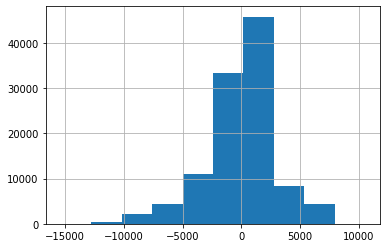

In [58]:
sample_vector['RES'].hist()
plt.show()